**Step 1**: Import Python Libraries

In [534]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Here i am importing this module to ignore Warning.
import warnings
warnings.filterwarnings('ignore')

**Step 2**: Reading Dataset

In [535]:
dataset_df = pd.read_csv(filepath_or_buffer="./hotel_bookings/hotel_bookings.csv")

In [536]:
dataset_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [537]:
dataset_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [538]:
dataset_df.shape

(119390, 32)

In [539]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [540]:
dataset_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [541]:
dataset_df.nunique(axis=0).sort_values()

hotel                                2
is_canceled                          2
is_repeated_guest                    2
arrival_date_year                    3
deposit_type                         3
reservation_status                   3
customer_type                        4
required_car_parking_spaces          5
meal                                 5
babies                               5
distribution_channel                 5
children                             5
total_of_special_requests            6
market_segment                       8
reserved_room_type                  10
arrival_date_month                  12
assigned_room_type                  12
adults                              14
previous_cancellations              15
stays_in_weekend_nights             17
booking_changes                     21
arrival_date_day_of_month           31
stays_in_week_nights                35
arrival_date_week_number            53
previous_bookings_not_canceled      73
days_in_waiting_list     

In [542]:
dataset_df.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [543]:
Total_null_values_in_each_column = dataset_df.isnull().sum()
df = pd.DataFrame({'Null Values' : Total_null_values_in_each_column, 'in %' : round(Total_null_values_in_each_column*100/dataset_df.shape[0],3)})
df.loc[df['Null Values']>0]

,Null Values,in %
children,4,0.003
country,488,0.409
agent,16340,13.686
company,112593,94.307


In [544]:
dataset_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [545]:
dataset_df.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

**Step 3**: Data Reduction

As you can see the 'company' column contains so many null values as well as many unique value's. Therefore, it makes no sense for this wide range of data if we substitute these null values with any arbitrary value. So, its better to drop this column.

In [546]:
dataset_df.drop(axis=0,columns='company', inplace= True)

**Step 4**: Data Cleaning/Wrangling

In [547]:
# Let's just simply find the total number of duplicate records this dataset contains and determine if they should be removed or handled.
duplicate_records = dataset_df.duplicated().sum()
f'The Dataset has {duplicate_records} duplicate records in total, making about {round(duplicate_records*100/dataset_df.shape[0])}% of this dataset'

'The Dataset has 32001 duplicate records in total, making about 27% of this dataset'

If we think logically it is very unlikely to have this high amount of  same/duplicate record's a hotel booking databases can have.
So, this indicates that we make the conclusion that no two or more records should have the same or exact details. Hence, it is better to remove those duplicate records.

In [548]:
dataset_df.drop_duplicates(inplace = True)

In [549]:
dataset_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [550]:
dataset_df.dropna(subset=['children'], axis= 0, inplace=True)

In [551]:
dataset_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [552]:
dataset_df.dropna(subset='country', axis= 0,  inplace=True)

In [553]:
dataset_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

In [554]:
dataset_df['agent'].fillna(value= 0, inplace = True)

In [555]:
dataset_df = dataset_df.astype({'children' : 'int64', 'agent' : 'int64'})

**Step 5**: Feature Engineering

In [556]:
dataset_df['Total_number_of_guests'] = dataset_df[["babies", 'adults', 'children']].sum(axis=1)

In [557]:
dataset_df['Total_nights_stay'] = dataset_df[['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1)

In [558]:
dataset_df['adr_per_person'] = round(dataset_df['adr']/dataset_df[['children', 'adults']].sum(axis=1),2)

Is it possible total_number_of_guests are 0.

In [559]:
filt1 =(dataset_df['Total_number_of_guests'] ==0)
filt1.sum(axis = 0)

161

In [560]:
dataset_df.drop(index= dataset_df.loc[filt1].index ,inplace= True)

is it possible total_nights_stay is < 0

In [561]:
(dataset_df['Total_nights_stay']<0).sum()

0

is it possible adr_per_person is <=0

In [562]:
filt2 = (dataset_df['adr_per_person']<=0)
filt2.sum()

1633

In [563]:
filt2

0          True
1          True
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: adr_per_person, Length: 86772, dtype: bool

In [564]:
dataset_df.drop(index= dataset_df.loc[filt2].index , inplace= True)

**Step 6**: EDA Exploratory Data Analysis

In [565]:
# Determine the Continuous and Categorical data columns
categorical_data = dataset_df.select_dtypes(include=['object']).columns
continuous_data = dataset_df.select_dtypes(include=['int64']).columns
{"categorical": len(categorical_data), "continuous" : len(continuous_data)}

{'categorical': 12, 'continuous': 20}

In [566]:
plt.rcParams["figure.figsize"] = [18, 8]

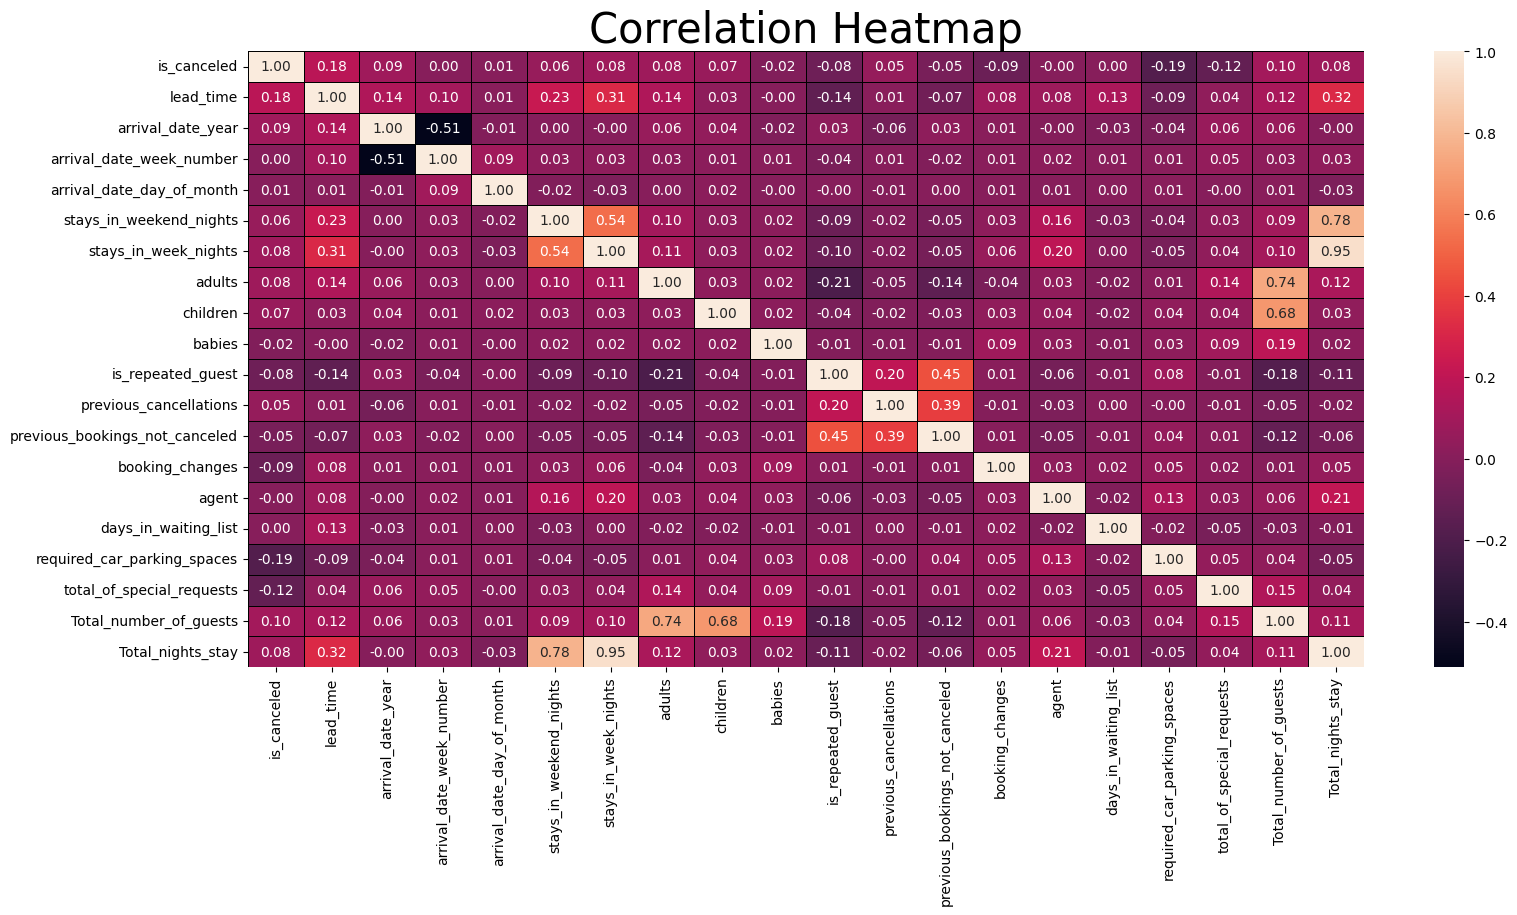

In [567]:
# correlation matrix
corr_matrix = dataset_df[continuous_data].corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap', fontdict={'fontsize' : 30})
plt.show()

<BarContainer object of 10 artists>

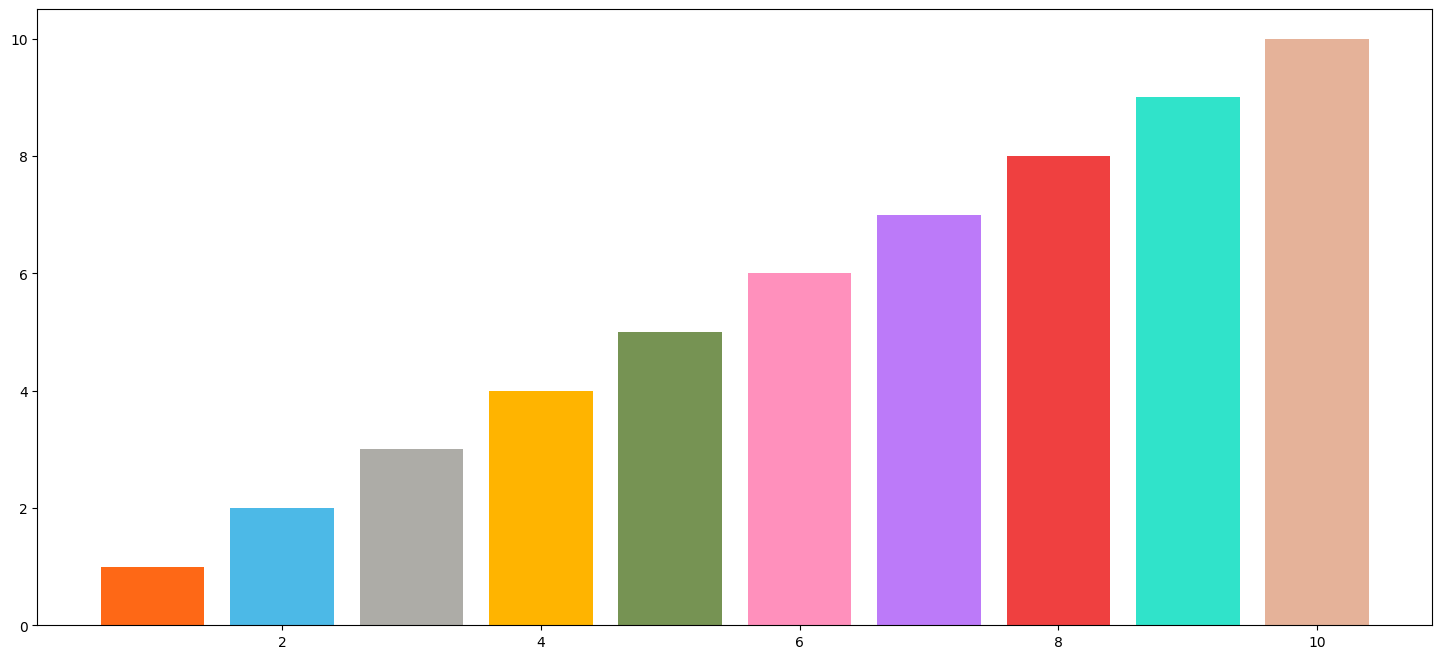

In [568]:
pallete = ["#FE6816","#4CB9E7","#ADACA7","#FFB400","#769353",'#FF90BC',"#BC7AF9","#EF4040","#30E3CA", "#E5B299"]
plt.bar([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], color = pallete)

In [569]:
# grouping
group = dataset_df.groupby(by='hotel')
city = group.groups.get('City Hotel')
resort = group.groups.get('Resort Hotel')

# confirmed booking 
confirmed_guests = dataset_df.loc[dataset_df['is_canceled']==0]

In [570]:
#  My  function to draw custom graphs
def my_plot(column : str, hotel = 'Overall' , subplot = 1, percentage = True, graph = 'countplot', title = 'Overall', top_x = 10, show_count = False, bar_xticks = None ,pie_labels=None, auto_pct = "%.2f%%"):
    # condition for hotel parameter
    if type(hotel) != str:
        plt.subplot(1,2,subplot)
        df = dataset_df.loc[hotel]
        font = 10
    else:
        df = dataset_df
        font = 18

    # filtering
    series = df[column].value_counts()[:top_x]

    # function for countplot
    if graph in ('countplot', 'countplot%'):
        percentage_list = [round(i*100/sum(series.values),2) for i in series]

        # condition for graph parameter
        if graph == 'countplot':
            val = series.values
        elif graph == 'countplot%':
            val = percentage_list

        # Graph Creation
        plt.bar(series.index.astype('str'), val, color = pallete, zorder=3)
        
        # condition for percentage perameter
        if percentage:
            for i, value in enumerate(percentage_list):
                plt.text(i, value, f"{value}%", ha='center', fontsize = font)

        # condition for show_count parameter
        if show_count:
            for i, value in enumerate(series.values):
                plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
        plt.ylabel("")

        # custom xticks for bar graph
        if bar_xticks != None:
            plt.xticks(series.index.astype('str') ,bar_xticks)

        plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    

    # function for pie chart
    if graph == 'pie':
        if pie_labels == None:
            pie_labels = list(series.index)
        plt.pie(series,  autopct=auto_pct, textprops={'fontsize':20}, explode = [0.1 for i in range(len(series))] , labels=pie_labels, colors = pallete[::2])

    # title of graph
    plt.title(title, fontsize = '24')


## <b> Q1.</b> What are the Total Number of bookings and Cancellations?

### A. In terms of numbers

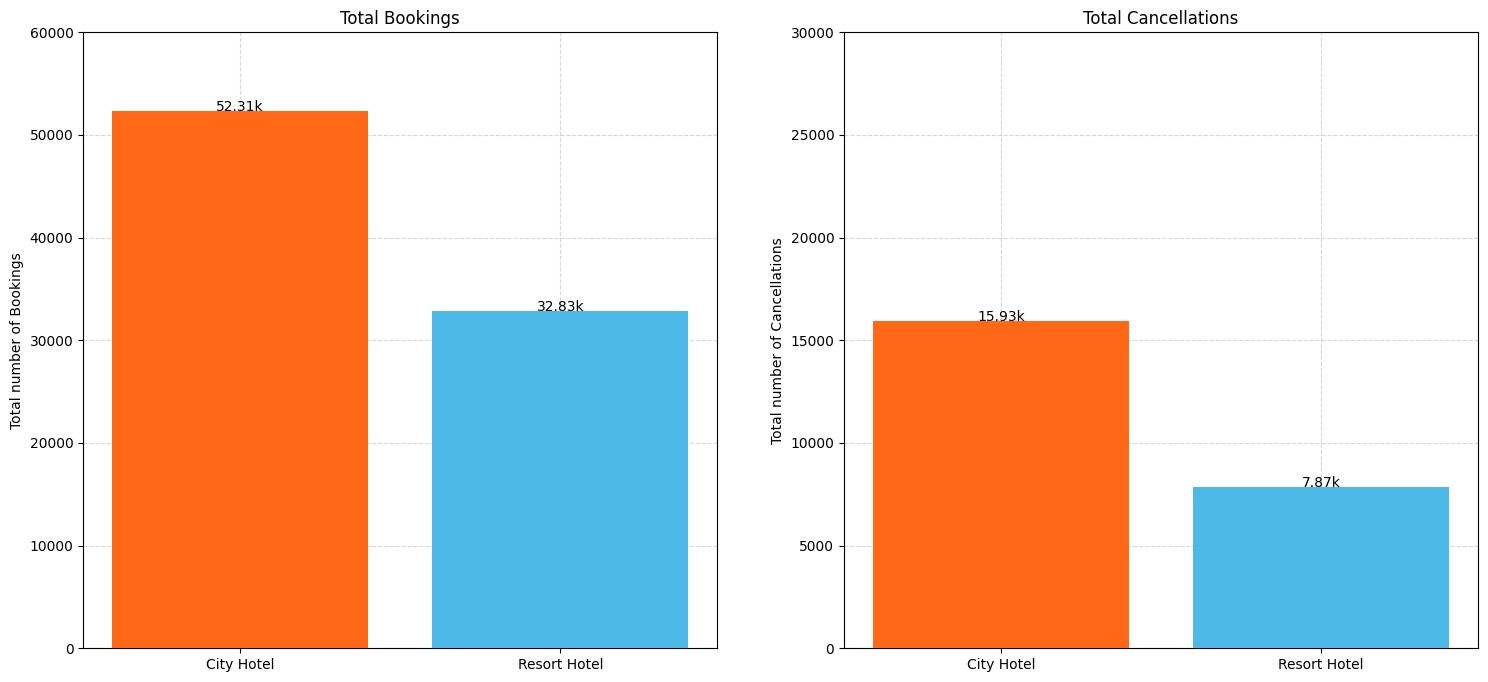

In [571]:
# defining series and functions for bar graph
series1 = dataset_df['hotel'].value_counts().rename("Total Bookings")
series2 = pd.Series({i : dataset_df.loc[dataset_df['hotel'] == i,'is_canceled'].sum() for i in sorted(dataset_df['hotel'].unique())}, name= "Total Cancellations")
df1 = pd.concat([series1, series2], axis=1)
def my_bar(series : pd.Series, subplot : int):
    plt.subplot(1,2,subplot)
    plt.bar(series.index, series.values, color = pallete ,zorder= 3)
    for i, value in enumerate(series.values):
        plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
    plt.ylim((0,round((series.max()/10000)+1)*10000))
    plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    plt.title(series.name)
    plt.ylabel(' number of '.join(series.name.split()))
    
my_bar(series = series1, subplot=1)
my_bar(series= series2,subplot=2)
plt.show()

### B. Hotel wise booking vs cancellations

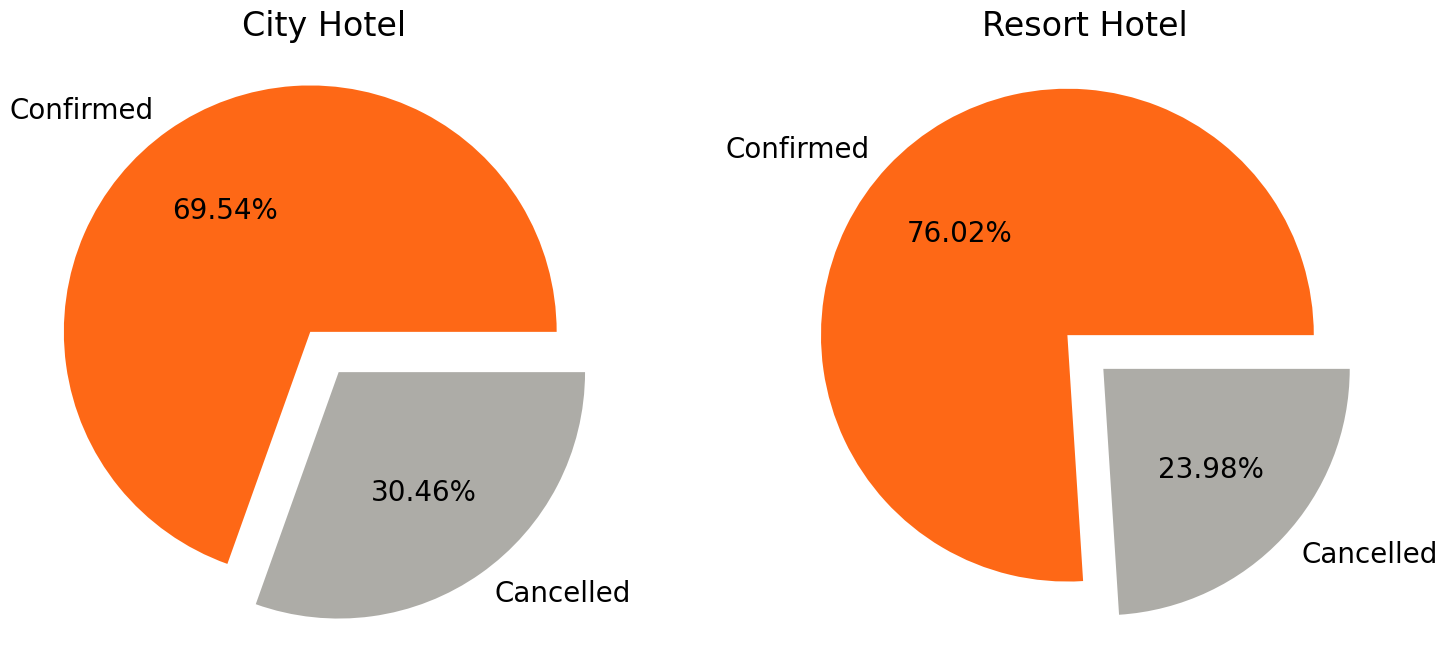

In [572]:
my_plot(hotel= city, column='is_canceled',graph='pie', title='City Hotel', pie_labels=['Confirmed', 'Cancelled'] )
my_plot(hotel= resort, column='is_canceled',graph='pie', title='Resort Hotel', pie_labels=['Confirmed', 'Cancelled'] , subplot= 2)

## <b> Q2.</b> Which agent gets the most bookings?


### A. Hotel wise

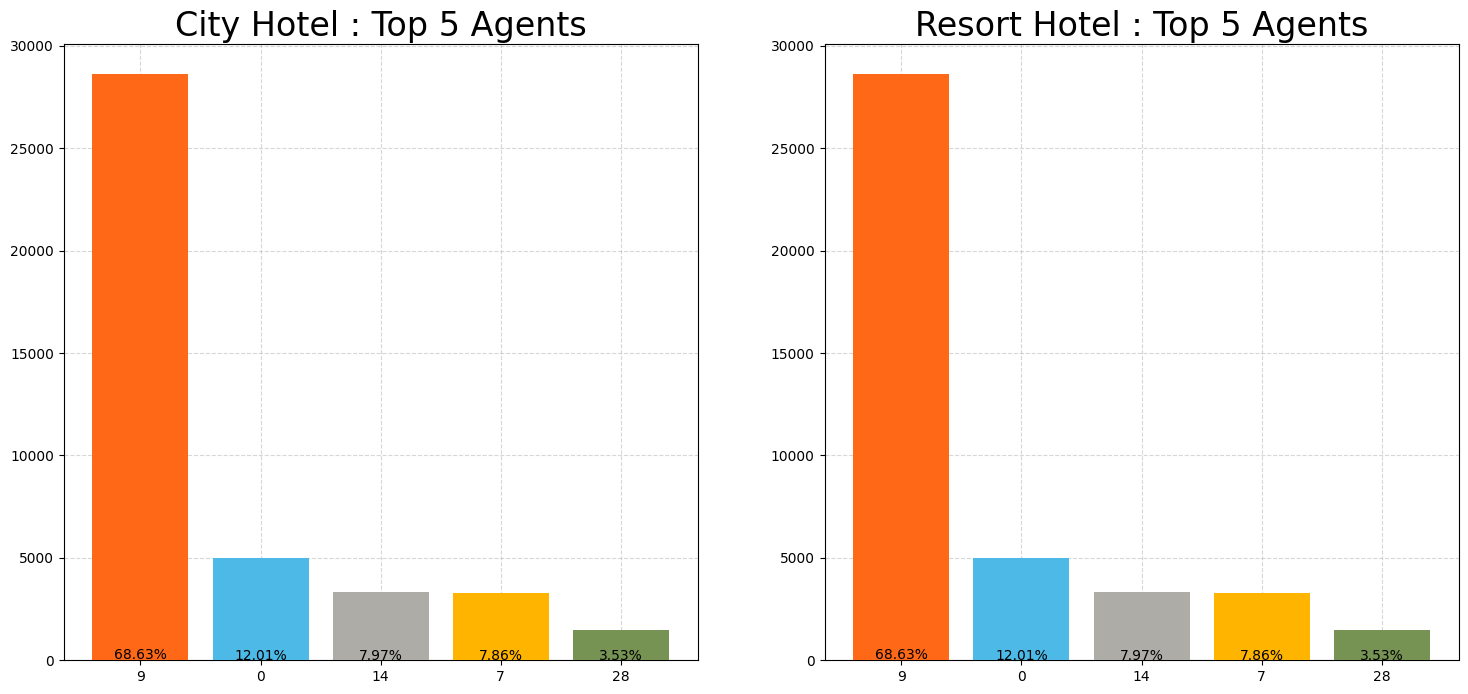

In [573]:
my_plot(column='agent', hotel=city, top_x= 5, title="City Hotel : Top 5 Agents")
my_plot(column='agent', hotel=city, top_x= 5, title="Resort Hotel : Top 5 Agents", subplot=2)

### B. Overall

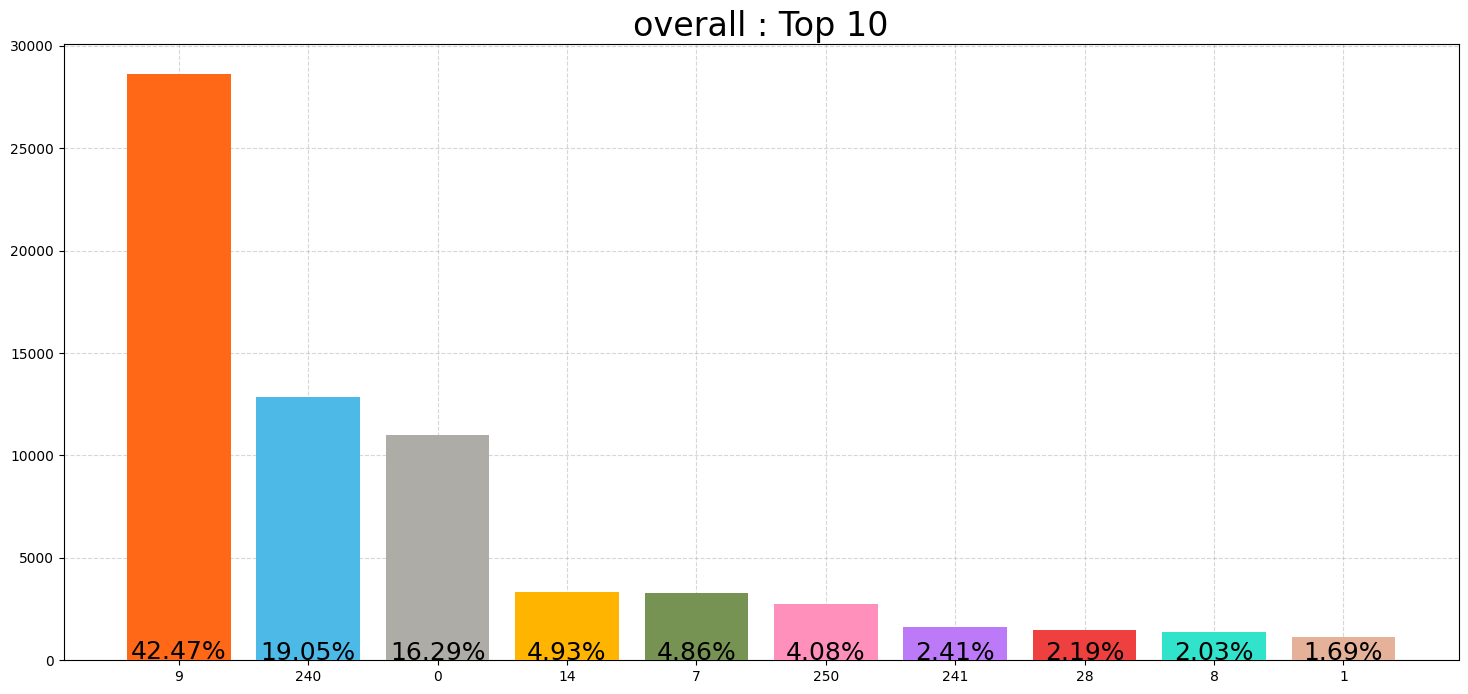

In [574]:
my_plot(column='agent', title= 'overall : Top 10')

## <b> Q3.</b> Which channel distribution is more often use by customers?

### A. Hotel wise

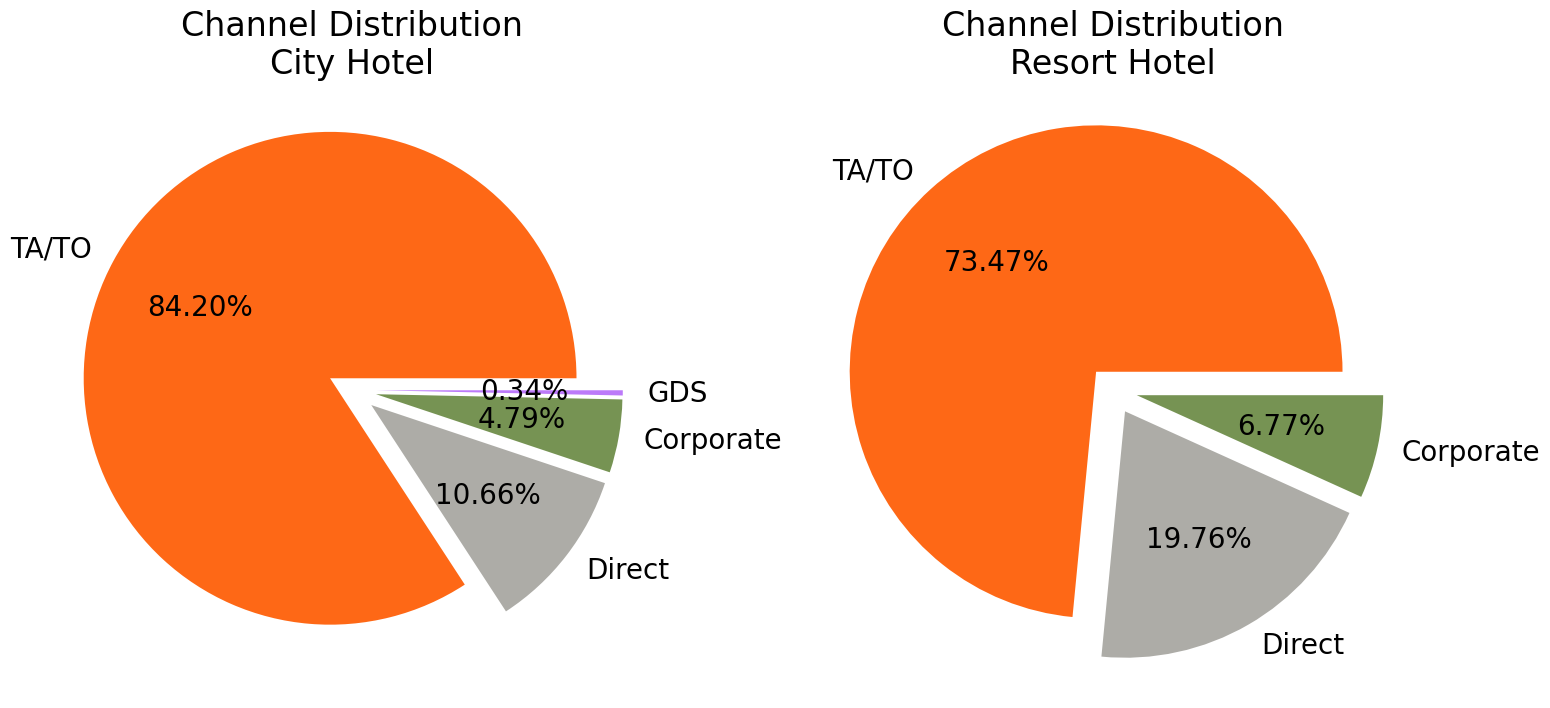

In [575]:
my_plot(column='distribution_channel', hotel=city, graph='pie', title='Channel Distribution\nCity Hotel')
my_plot(column='distribution_channel', hotel=resort, graph='pie', title= 'Channel Distribution\nResort Hotel',top_x=3, subplot=2)

### B. Overall

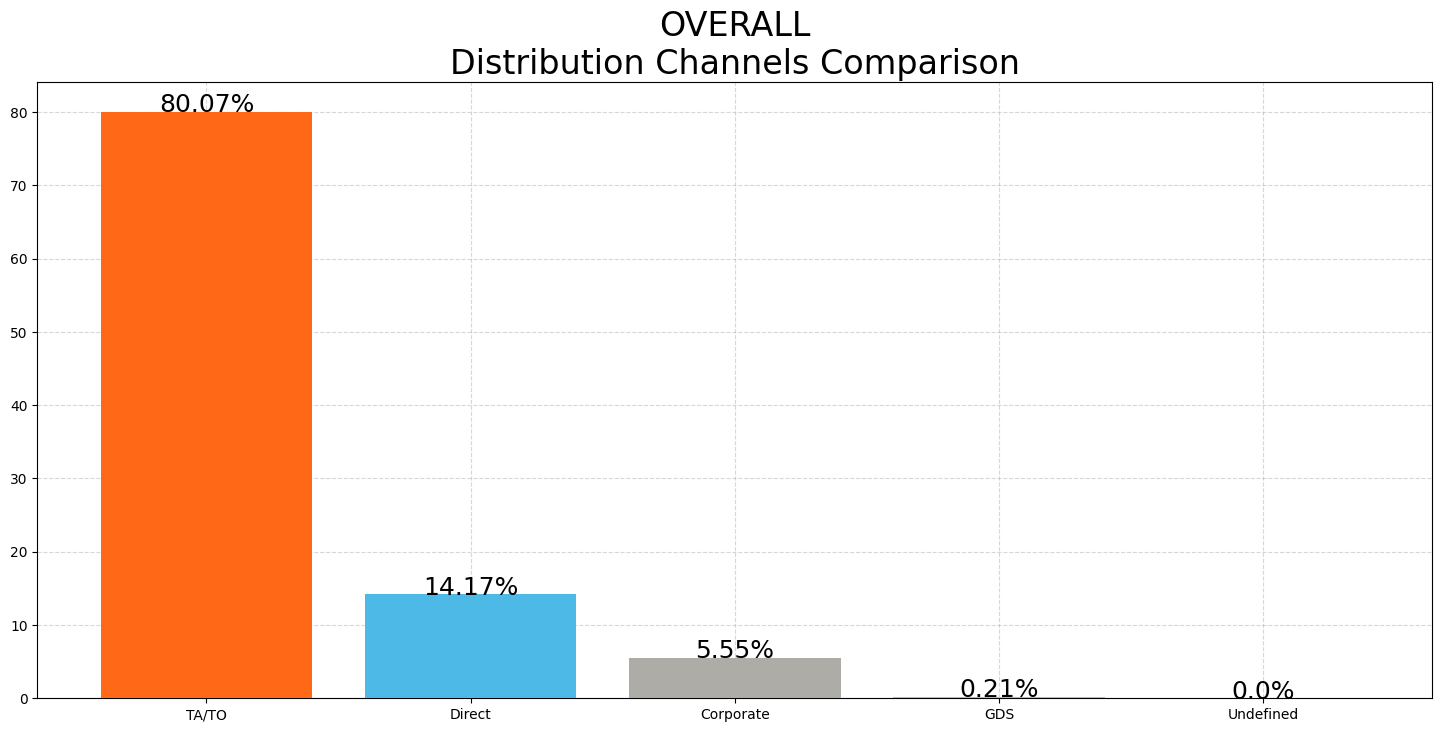

In [576]:
my_plot(column='distribution_channel', graph='countplot%', title="OVERALL\nDistribution Channels Comparison")

## <b> Q4.</b> Which Meal is the most favourite \\ Opted meal by a customers?

### A. Hotel wise

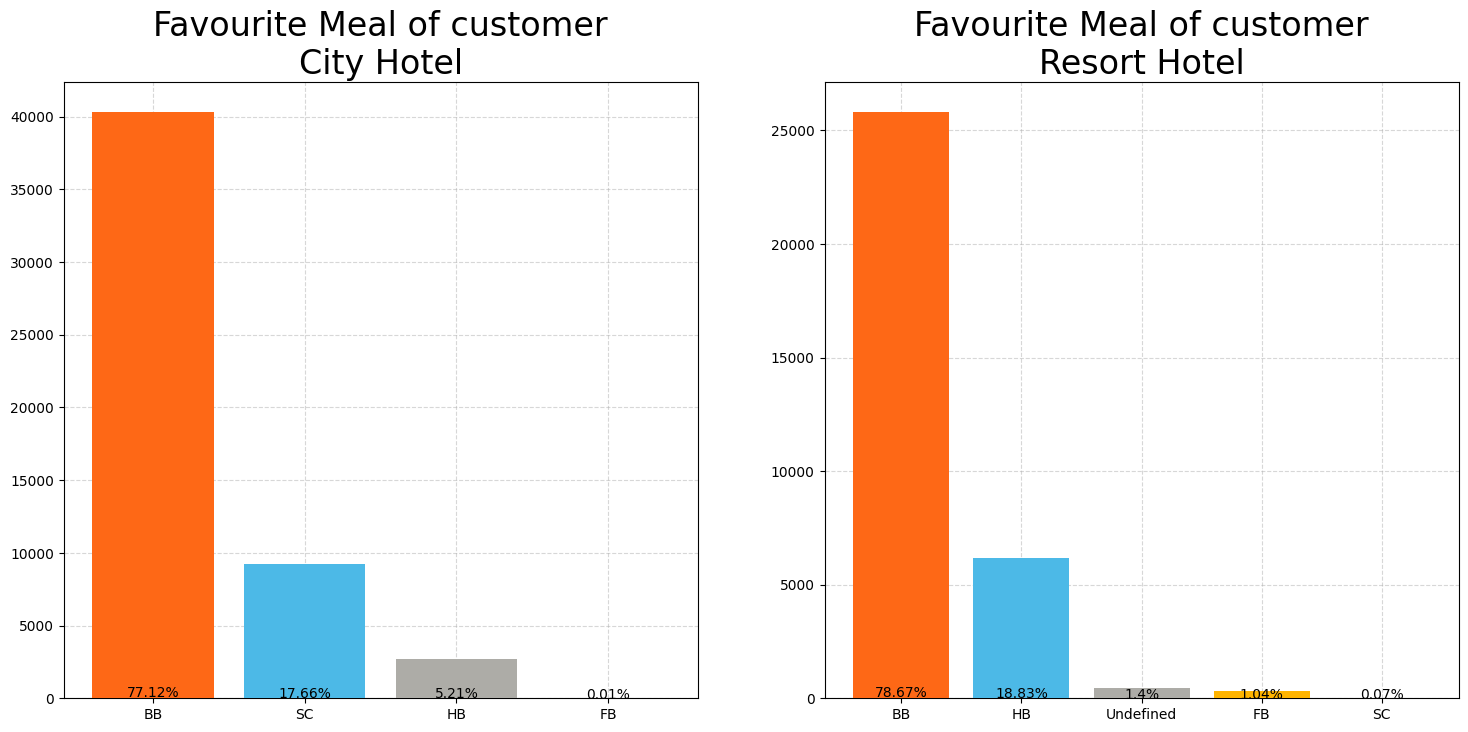

In [577]:
string = 'Favourite Meal of customer'
my_plot(column='meal',hotel = city, title = f"{string}\nCity Hotel", subplot= 1)
my_plot(column='meal',hotel = resort, title = f"{string}\nResort Hotel", subplot= 2)

### B. Overall

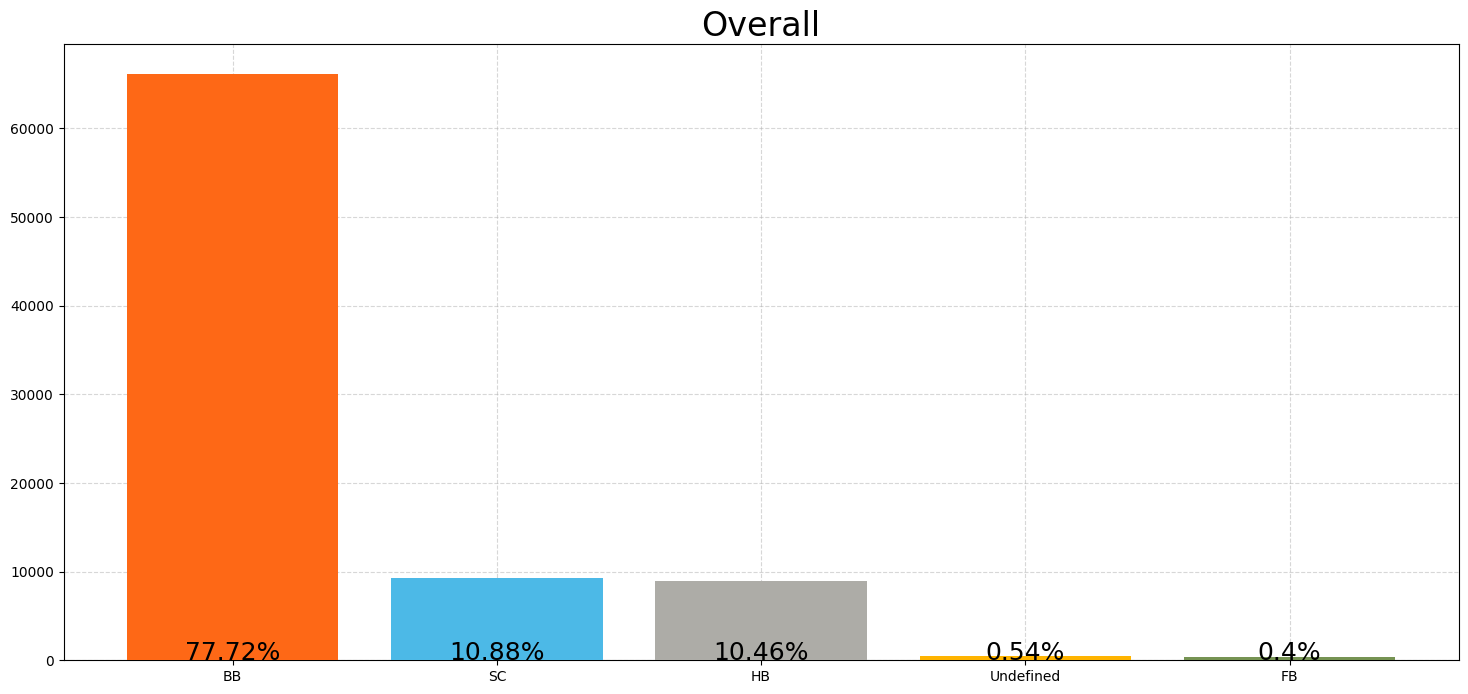

In [578]:
my_plot(column= 'meal')

## **Q5.** Which country makes the most reservations?

### A. Hotel wise

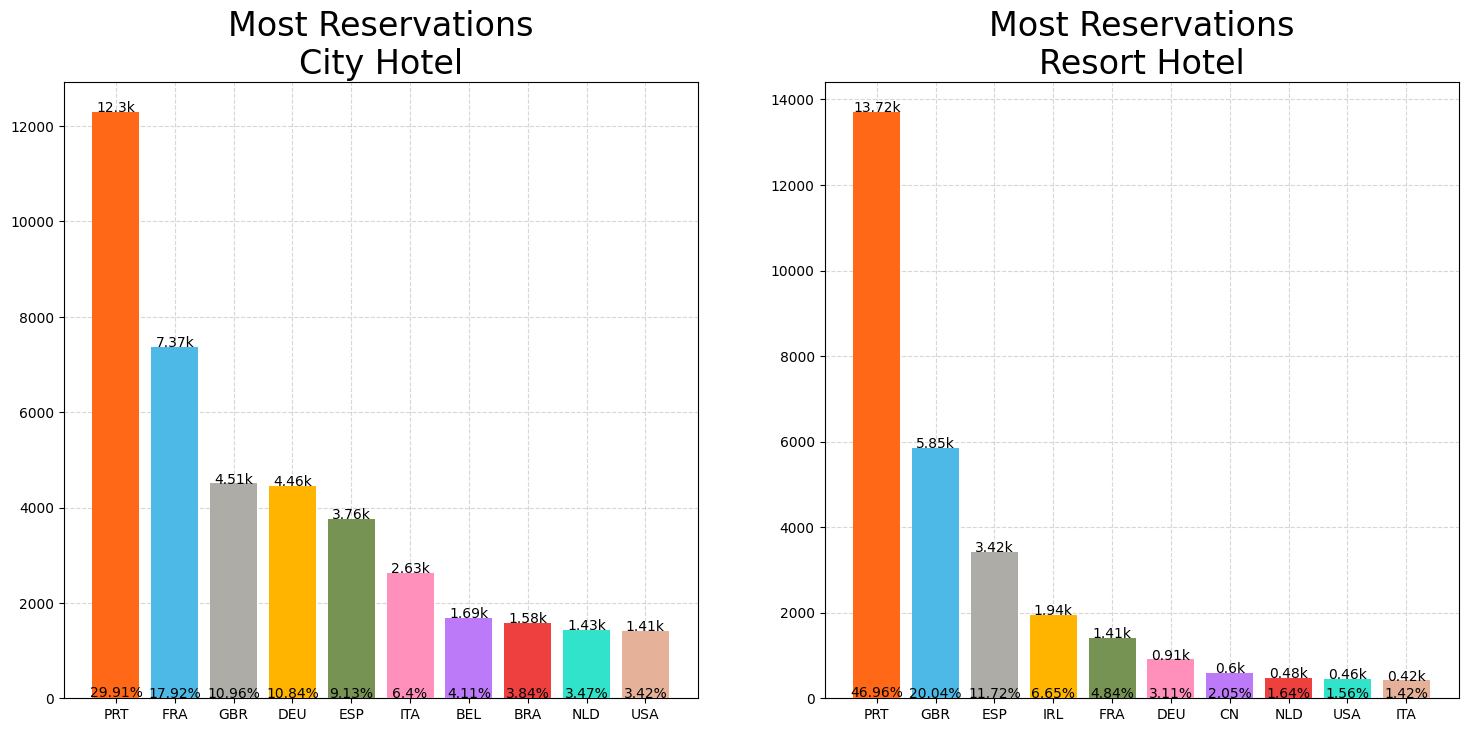

In [579]:
string = "Most Reservations"
my_plot(column='country', hotel=city, title=f"{string}\nCity Hotel", subplot=1, show_count = True)
my_plot(column='country', hotel=resort, title=f"{string}\nResort Hotel", subplot=2, show_count = True)

### B. Overall

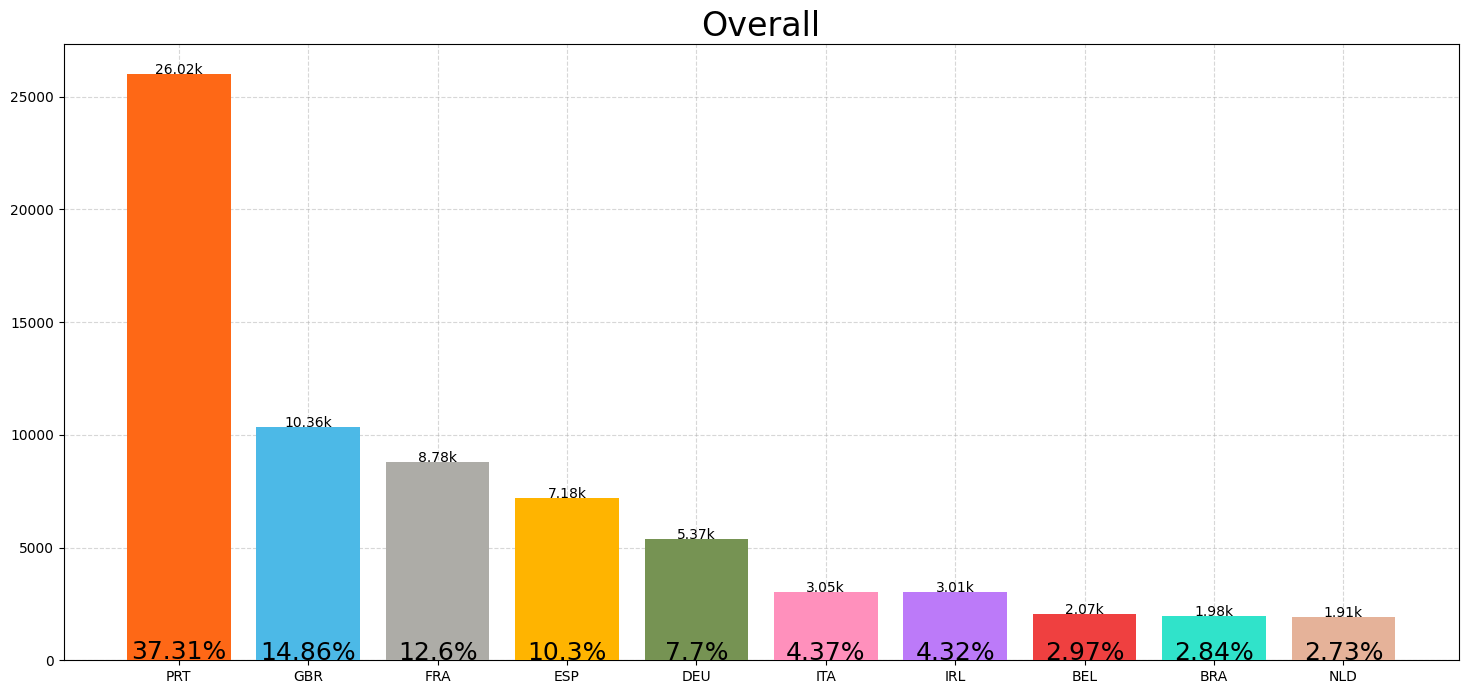

In [580]:
my_plot(column='country', show_count = True)

## **Q6.** In which year more reservations are made?

### A. Hotel wise

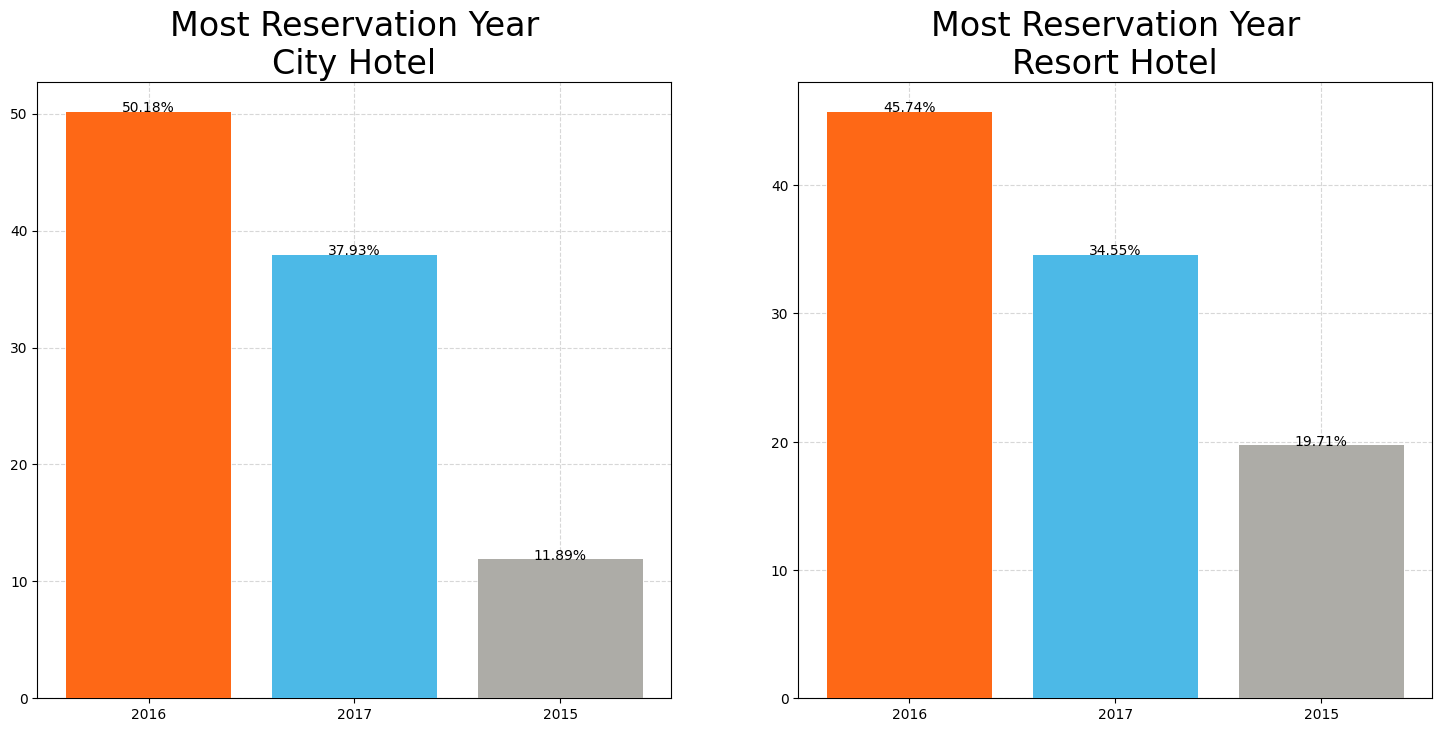

In [581]:
my_plot(column = 'arrival_date_year', hotel = city, subplot= 1, graph='countplot%', title = 'Most Reservation Year\nCity Hotel')
my_plot(column = 'arrival_date_year', hotel = resort, subplot= 2, graph='countplot%', title = 'Most Reservation Year\nResort Hotel')

### B. Overall

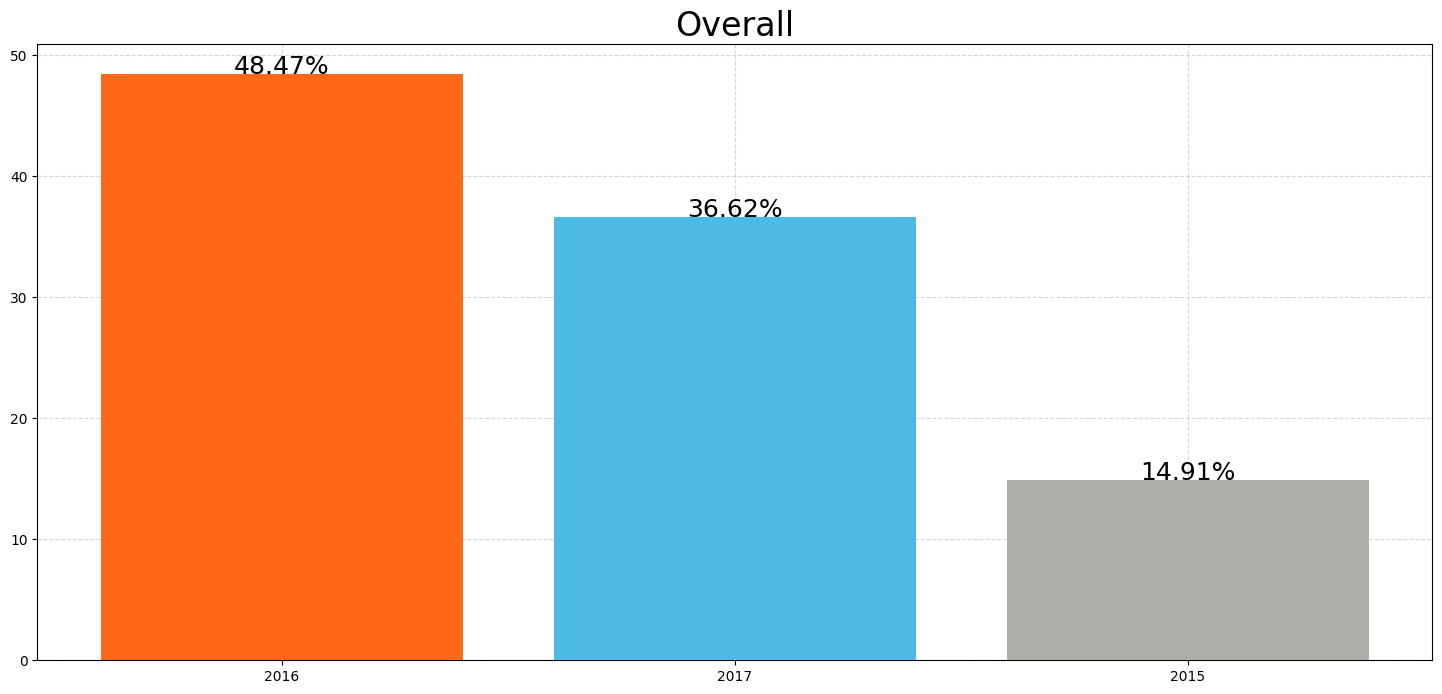

In [582]:
my_plot(column = 'arrival_date_year', graph='countplot%')

## **Q7.** In which Month more reservations was made?

### A. Hotel wise

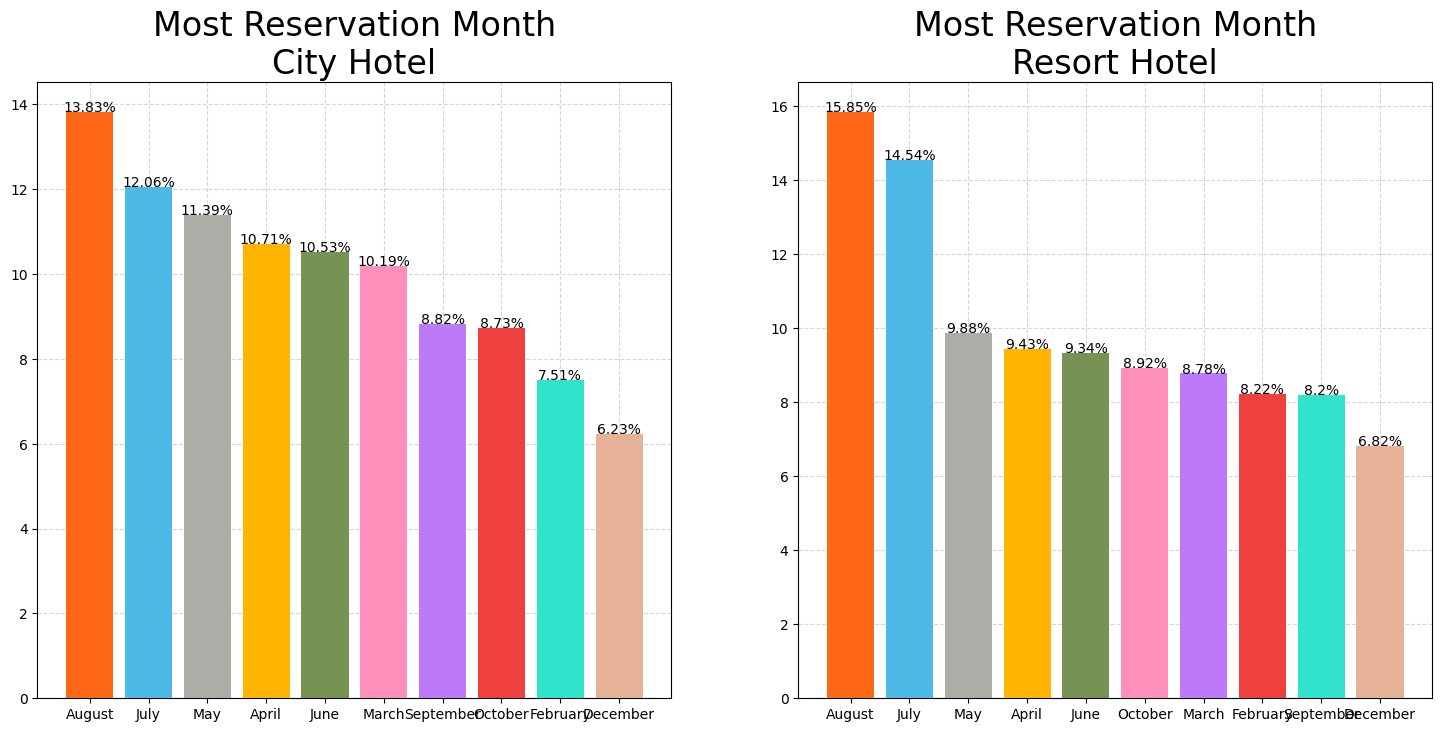

In [583]:
my_plot(column = 'arrival_date_month', hotel = city, subplot= 1, graph='countplot%', title = 'Most Reservation Month\nCity Hotel')
my_plot(column = 'arrival_date_month', hotel = resort, subplot= 2, graph='countplot%', title = 'Most Reservation Month\nResort Hotel')

### B. Overall

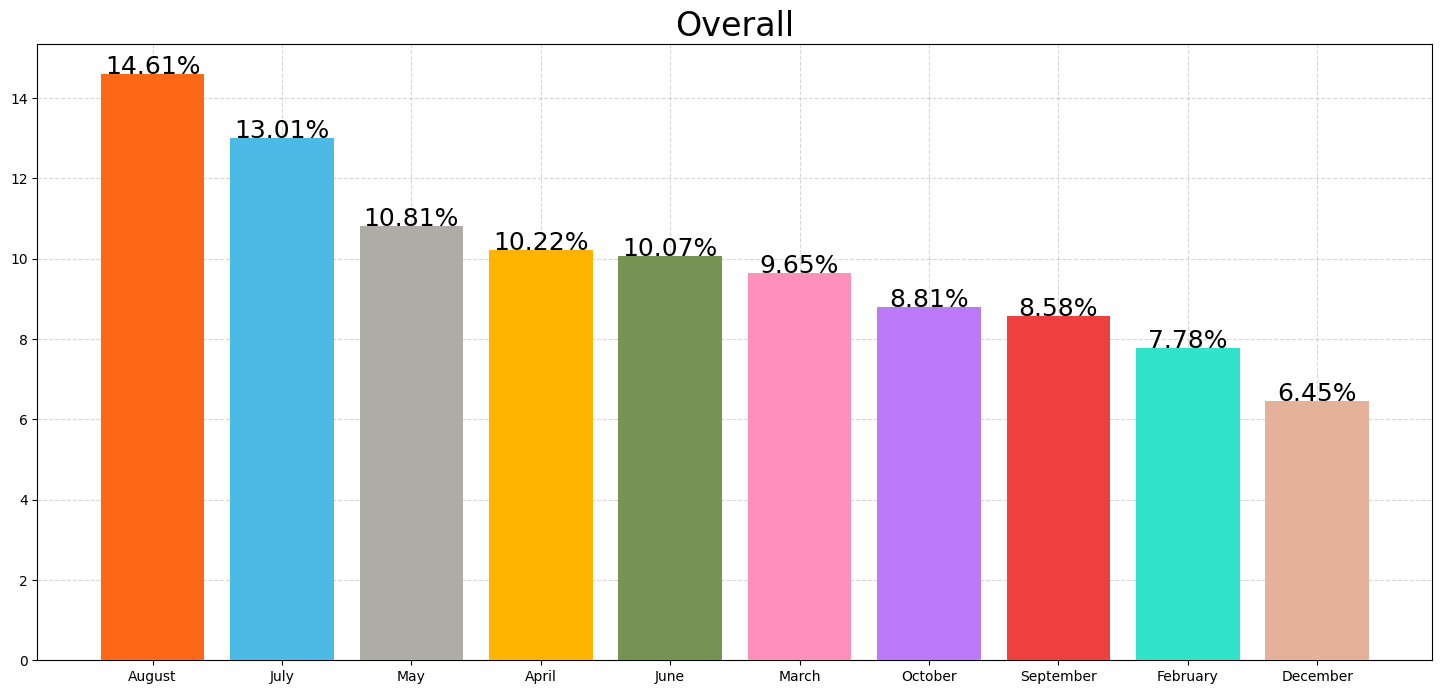

In [584]:
my_plot(column = 'arrival_date_month', subplot= 1, graph='countplot%')

## **Q8.** How many reservation were made by repeated guests?

### A. Hotel wise

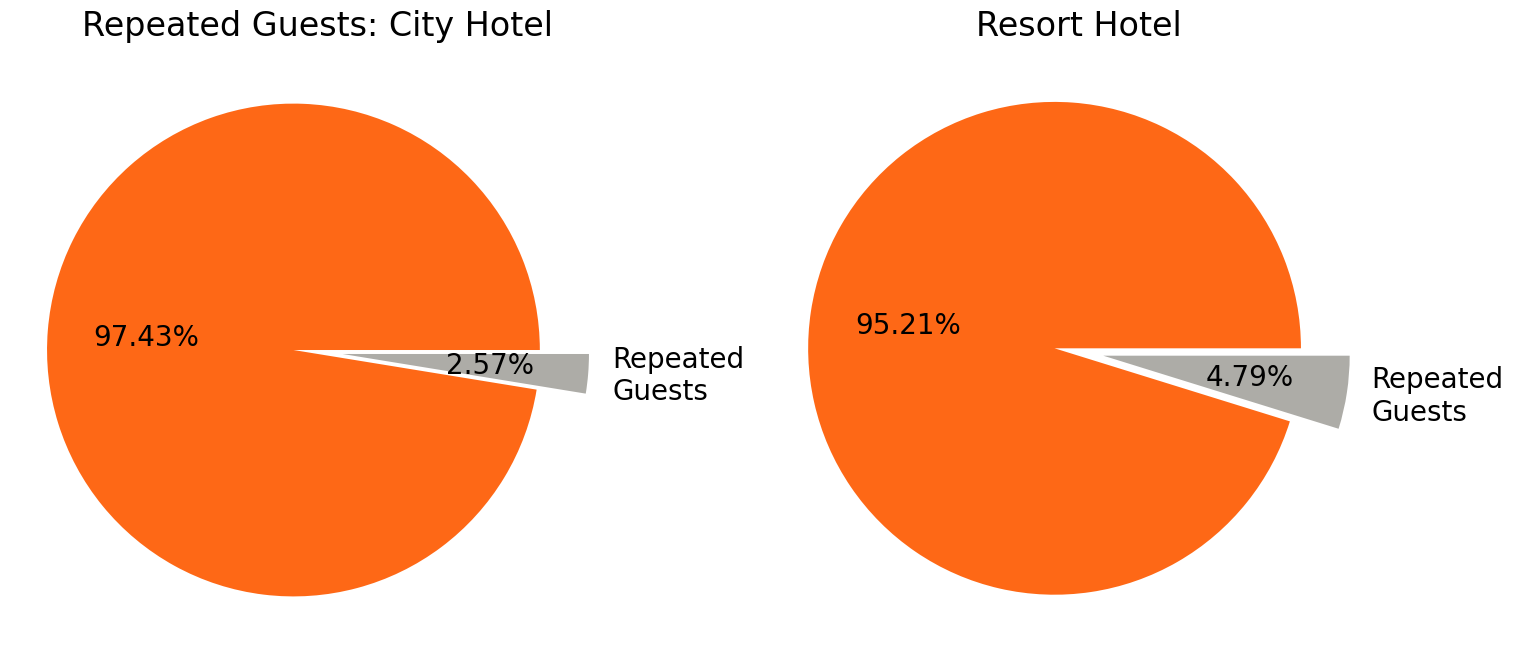

In [585]:
my_plot(hotel= city, column='is_repeated_guest', graph='pie', pie_labels=['', 'Repeated\nGuests'], title='Repeated Guests: City Hotel')
my_plot(hotel= resort, column='is_repeated_guest', graph='pie', pie_labels=['', 'Repeated\nGuests'], title='Resort Hotel', subplot= 2)

### B. Overall

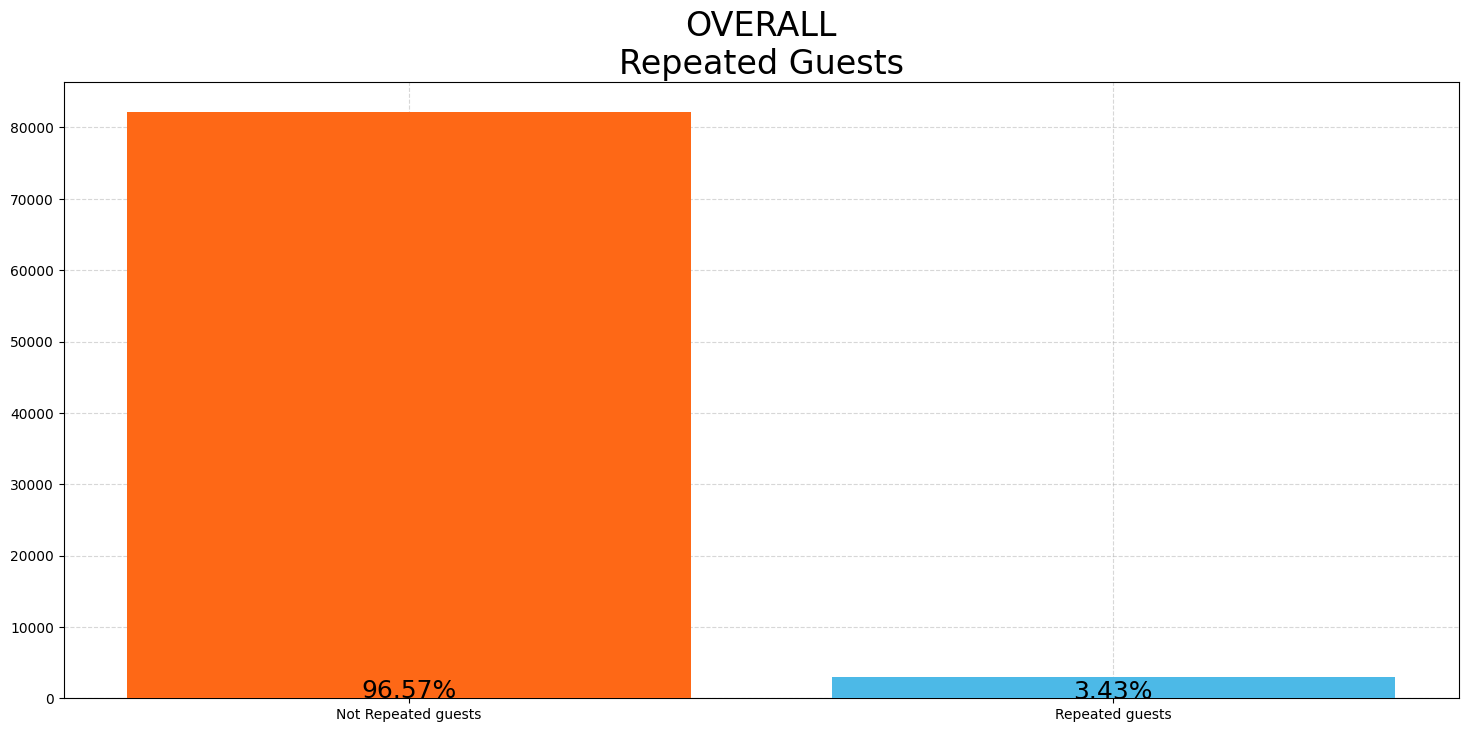

In [586]:
my_plot(column='is_repeated_guest', title='OVERALL\nRepeated Guests', bar_xticks=['Not Repeated guests', 'Repeated guests'])

## **Q9.** what is the preferred stay length by guests in each type of hotel ?

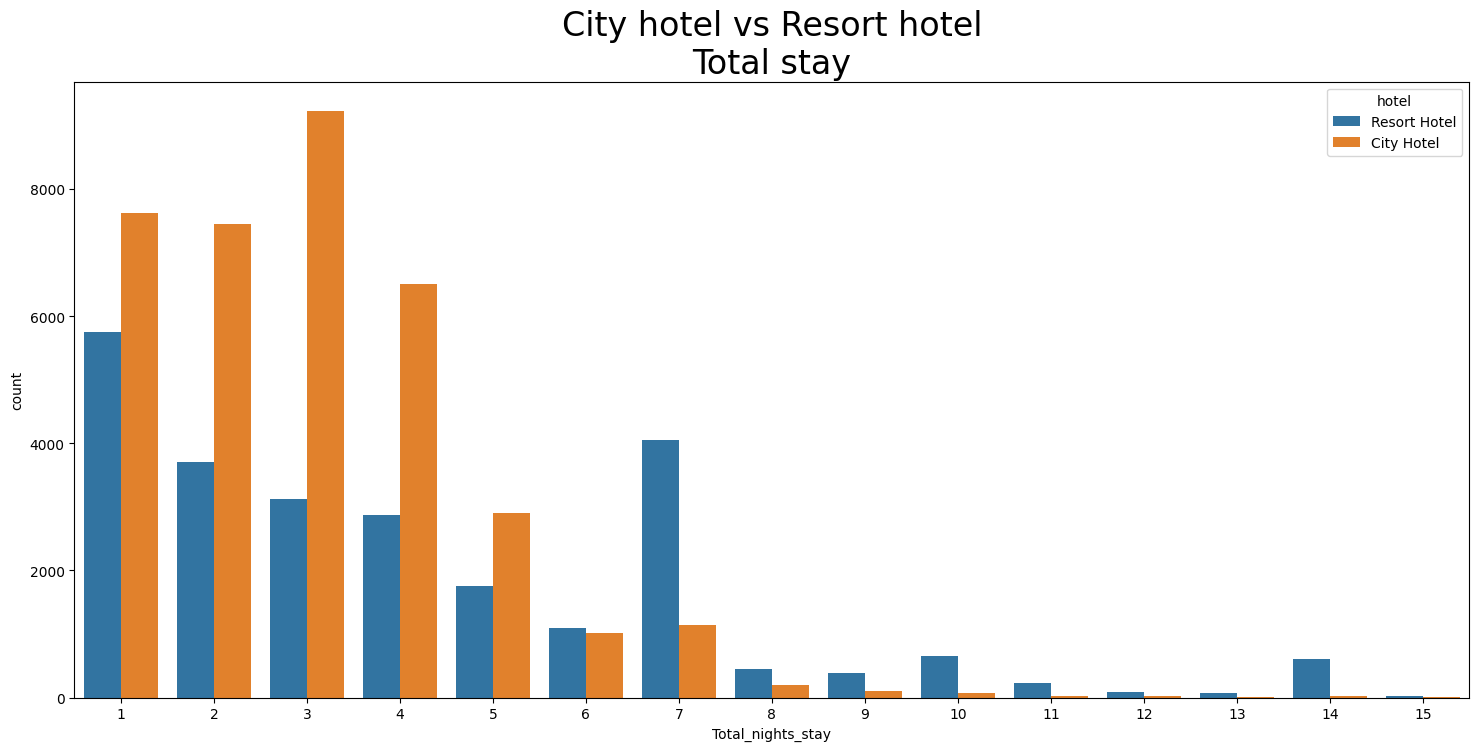

In [587]:
hotel_stay = confirmed_guests.loc[confirmed_guests['Total_nights_stay']<16]
sns.countplot(data=hotel_stay, x = 'Total_nights_stay', hue='hotel')
plt.title('City hotel vs Resort hotel\nTotal stay', fontsize = 24)
plt.show()

## **Q10.** How does the adr/price per night vary over the year?

In [588]:
filt = confirmed_guests.groupby(by='hotel')
city_adr_month_wise = filt.get_group('City Hotel').groupby(by = 'arrival_date_month')['adr_per_person'].mean()
resort_adr_month_wise = filt.get_group('Resort Hotel').groupby(by = 'arrival_date_month')['adr_per_person'].mean()

arranged_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
arranged_records = pd.merge(left= city_adr_month_wise, right= resort_adr_month_wise, on = 'arrival_date_month').loc[arranged_months]
arranged_records.columns = ['City Hotel', 'Resort Hotel']
arranged_records


,City Hotel,Resort Hotel
arrival_date_month,,
January,51.585592,31.087044
February,50.709354,31.322531
March,53.007306,34.859057
April,60.411289,44.850973
May,73.566368,43.551185
June,68.060050,57.665128
July,58.591914,71.629591
August,59.520373,84.478563
September,71.620694,51.762899


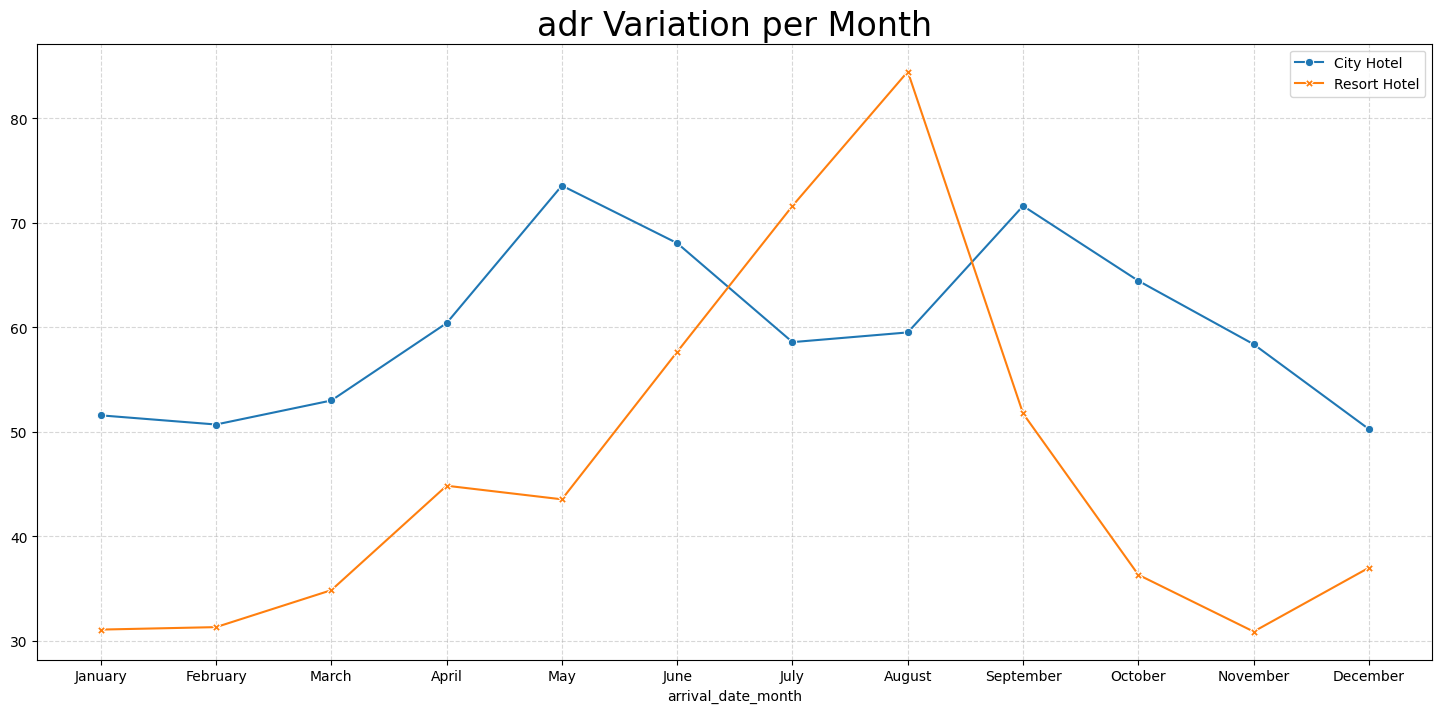

In [589]:
sns.lineplot(data=arranged_records, markers= True, dashes=False)
plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
plt.title('adr Variation per Month', fontsize = 24)
plt.show()

## **Q11.** How the the prices are distributed across the room type?

(0.0, 150.0)

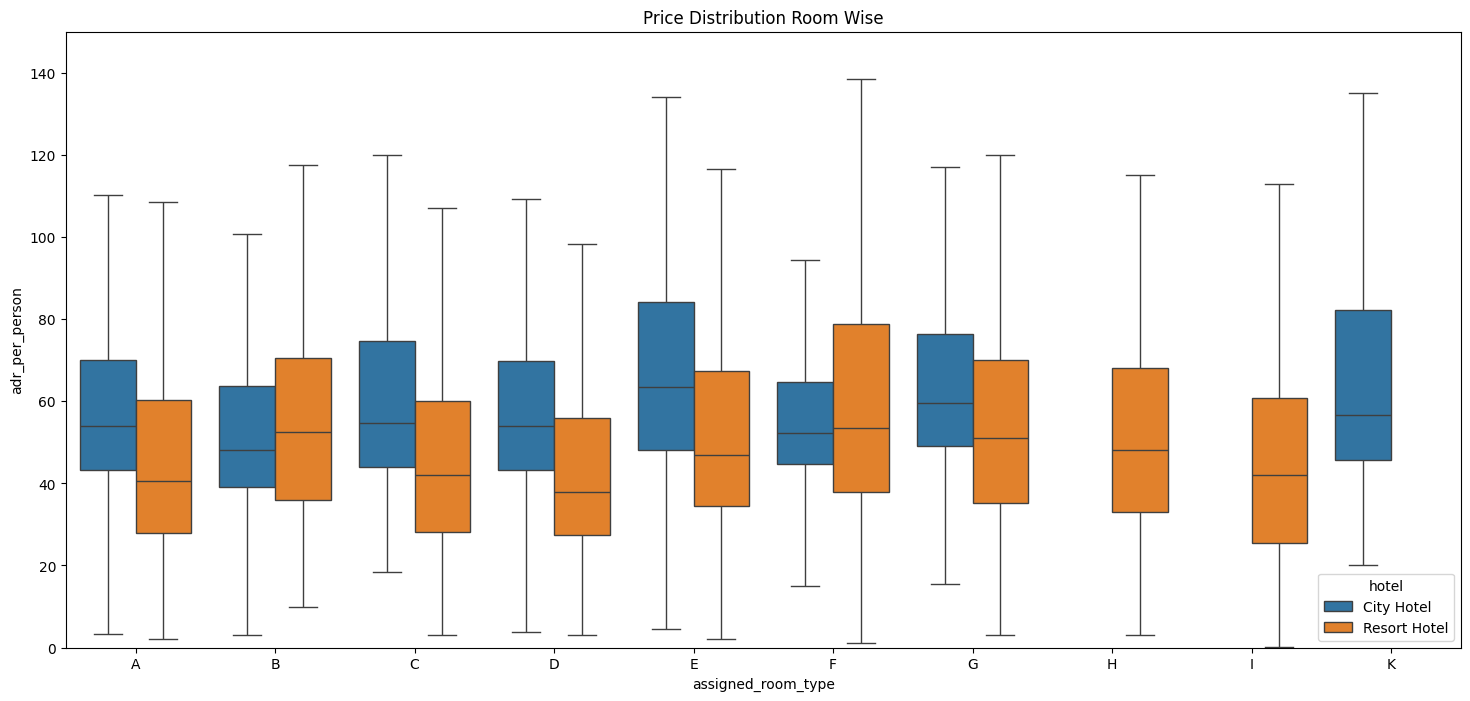

In [590]:
adr_room_type = confirmed_guests.loc[:,['hotel', 'assigned_room_type', 'adr_per_person']].sort_values(by='assigned_room_type')
sns.boxplot(x = 'assigned_room_type', y = 'adr_per_person', data=adr_room_type, hue='hotel', fliersize=0)
plt.title('Price Distribution Room Wise')
plt.ylim(0,150)